# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import csv

# Data Preprocessing Pipeline

In [2]:
# importing weekday excel file
df = pd.read_csv("C:/Users/Vasu/Documents/web scraping/new/final/combined_weekday_final1_oyo.csv")

In [3]:
df.head()

,Hotel Name,Area,Location,Original Price,Discounted Price,Discount,User Rating,Rating Summary,Total Ratings,Tax,Amenities,Region
0,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,"Shakarpur Khas Near Inferno Gym Block U, Delhi",2794,662,72%,3.4,3.4 (411 Ratings)·Fair,411 Ratings),+ ₹120 taxes & fees · per room per night,Free Wifi Geyser Power backup + 3 more,Delhi
1,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,"Shakarpur Khas Near Inferno Gym Block U, Delhi",2794,662,72%,3.4,3.4 (411 Ratings)·Fair,411 Ratings),+ ₹120 taxes & fees · per room per night,Free Wifi Geyser Power backup + 3 more,Delhi
2,Townhouse 1190 The Grand Plaza,nampally,"Nampally, Hyderabad",4125,889,74%,3.5,3.5 (63 Ratings)·Good,63 Ratings),+ ₹147 taxes & fees · per room per night,Reception Ticket tour assistance Public was...,Hyderabad
3,28119 Omkar Global Inn,bgs hospital,"Near BGS hospital, Bangalore",2638,490,77%,3.4,3.4 (90 Ratings)·Fair,90 Ratings),+ ₹109 taxes & fees · per room per night,Parking facility Reception Free Wifi + 21 ...,Bangalore
4,3 BY OYO Nami Residency Ahmedabad,paldi,"Near Vs Hospital, V S Hospital, Ahmedabad",6000,2857,45%,4.6,4.6 (517 Ratings)·Excellent,517 Ratings),+ ₹443 taxes & fees · per room per night,Reception Bath Tub Power backup + 68 more,Ahmedabad


In [4]:
# Extract numerical part from 'Total Ratings' and handle 'Not Available'
df['Total Ratings'] = df['Total Ratings'].apply(lambda x: int(x.split()[0]) if (isinstance(x, str) and x.split()[0].isdigit()) else None if 'Not Available' not in str(x) else None)

In [5]:
# Extracting the rating summary from the string using delemiter split
df[["tobedeleted", "Rating_Summary"]] = df["Rating Summary"].str.split(")", n=1, expand=True)

In [6]:
# Dropping the unwanted columns
df.drop(columns=['tobedeleted', 'Rating Summary'], inplace=True)

In [7]:
df.columns = df.columns.str.strip()

In [8]:
# Extracting the numerical value from 'Tax'
df['Tax_Additional'] = df['Tax'].str.extract(r'(\d+\.?\d*)').astype(float)

In [9]:
df[['Tax', 'Tax_Additional']]

,Tax,Tax_Additional
0,+ ₹120 taxes & fees · per room per night,120.0
1,+ ₹120 taxes & fees · per room per night,120.0
2,+ ₹147 taxes & fees · per room per night,147.0
3,+ ₹109 taxes & fees · per room per night,109.0
4,+ ₹443 taxes & fees · per room per night,443.0
...,...,...
1955,+ ₹136 taxes & fees · per room per night,136.0
1956,+ ₹155 taxes & fees · per room per night,155.0
1957,+ ₹129 taxes & fees · per room per night,129.0
1958,+ ₹212 taxes & fees · per room per night,212.0


In [10]:
# dropping unwanted columns
df.drop(columns=['Tax',], inplace=True)

In [11]:
# removing % from discount
df['Discount'] = df['Discount'].replace("%","", regex=True)

In [12]:
# extracting 12 characters from hotel name to derive hotel catrgory
df['Hotel Category'] = df['Hotel Name'].str[:12]

In [13]:
max_categories = 2

In [14]:
# Splitting the Hotel Category into two columns
df[['Category1', 'Category2']] = df['Hotel Category'].str.split(n=max_categories - 1, expand=True)

In [15]:
#concatanating both the category into Hotel_category
df['Hotel_Category'] = df['Category1'] + ' ' + df['Category2']

In [16]:
# dropping the unwanted columns
df.drop(['Category1', 'Category2', 'Hotel Category'], axis=1, inplace=True)

In [17]:
# Grouping the Hotel_Category
conditions = [
    df['Hotel_Category'].str.contains('Super OYO', case=False, na=False),
    df['Hotel_Category'].str.contains('Collection O', case=False, na=False),
    df['Hotel_Category'].str.contains('Capital O', case=False, na=False),
    df['Hotel_Category'].str.contains('Flagship', case=False, na=False),
    df['Hotel_Category'].str.contains('Townhouse', case=False, na=False),
    df['Hotel_Category'].str.contains('OYO Homes', case=False, na=False),
    df['Hotel_Category'].str.contains('Spot ON', case=False, na=False),
    df['Hotel_Category'].str.contains('SilverKe', case=False, na=False),
    df['Hotel_Category'].str.contains('OYO Hotel', case=False, na=False),
    df['Hotel_Category'].str.contains('OYO Palatte', case=False, na=False)
]

In [18]:
categories = ['Super OYO', 'Collection O', 'Capital O', 'Flagship', 'Townhouse', 'OYO Homes', 'Spot ON', 'Silver Key', 'OYO Hotels', 'OYO Palatte']

In [19]:
df['Hotel Category'] = np.select(conditions, categories, default='Others')

In [20]:
df['Hotel Category'].value_counts()

Hotel Category
Flagship        501
Others          455
Super OYO       352
Collection O    287
OYO Hotels      159
Townhouse        82
Spot ON          56
Capital O        52
Silver Key       16
Name: count, dtype: int64

In [21]:
df

,Hotel Name,Area,Location,Original Price,Discounted Price,Discount,User Rating,Total Ratings,Amenities,Region,Rating_Summary,Tax_Additional,Hotel_Category,Hotel Category
0,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,"Shakarpur Khas Near Inferno Gym Block U, Delhi",2794,662,72,3.4,411.0,Free Wifi Geyser Power backup + 3 more,Delhi,·Fair,120.0,Flagship Pa,Flagship
1,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,"Shakarpur Khas Near Inferno Gym Block U, Delhi",2794,662,72,3.4,411.0,Free Wifi Geyser Power backup + 3 more,Delhi,·Fair,120.0,Flagship Pa,Flagship
2,Townhouse 1190 The Grand Plaza,nampally,"Nampally, Hyderabad",4125,889,74,3.5,63.0,Reception Ticket tour assistance Public was...,Hyderabad,·Good,147.0,Townhouse 1,Townhouse
3,28119 Omkar Global Inn,bgs hospital,"Near BGS hospital, Bangalore",2638,490,77,3.4,90.0,Parking facility Reception Free Wifi + 21 ...,Bangalore,·Fair,109.0,28119 Omkar,Others
4,3 BY OYO Nami Residency Ahmedabad,paldi,"Near Vs Hospital, V S Hospital, Ahmedabad",6000,2857,45,4.6,517.0,Reception Bath Tub Power backup + 68 more,Ahmedabad,·Excellent,443.0,3 BY OYO Nam,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,Townhouse Singasandra Hosa Road,singasandra,"Singasandra, Bangalore",3749,798,75,4.5,141.0,Elevator Free Wifi Geyser + 4 more,Bangalore,·Excellent,136.0,Townhouse Si,Townhouse
1956,Townhouse THE PRIME HOTELS HBR,hbr layout,"Telecom Layout HBR Layout, Bangalore",3882,954,71,4.1,261.0,Elevator Free Wifi Geyser + 5 more,Bangalore,·Very Good,155.0,Townhouse TH,Townhouse
1957,Townhouse Vero Near World Mark Mall,sector 64,"Dharam Tower, Near World Mark, Main Road Medaw...",3397,739,74,4.2,994.0,Reception Free Wifi Power backup + 19 more,Gurgaon,·Very Good,129.0,Townhouse Ve,Townhouse
1958,Townhouse White Ridge 112 Shivam Road,nallakunta,"New Nallakunta, Hyderabad",5557,1519,68,4.2,629.0,Parking facility Reception Free Wifi + 14 ...,Hyderabad,·Very Good,212.0,Townhouse Wh,Townhouse


In [22]:
df2 = df.groupby('Region')['Hotel Category'].value_counts()
df2 = pd.DataFrame(df2)
df2

count
Region    Hotel Category       
Ahmedabad Collection O       20
          Flagship           13
          OYO Hotels         12
          Others              5
          Super OYO           4
...                         ...
Pune      OYO Hotels         10
          Spot ON             7
          Capital O           3
          Townhouse           2
          Silver Key          1

[87 rows x 1 columns]

In [23]:
# Pivot the DataFrame
pivot_df = df2.pivot_table(index='Region', columns='Hotel Category', values='count', aggfunc='sum', fill_value=0)
pivot_df

Hotel Category,Capital O,Collection O,Flagship,OYO Hotels,Others,Silver Key,Spot ON,Super OYO,Townhouse
Region,,,,,,,,,
Ahmedabad,2,20,13,12,5,1,1,4,2
Bangalore,11,43,46,14,70,0,23,63,10
Chennai,1,16,48,1,26,2,6,12,8
Delhi,2,23,117,40,72,2,2,37,5
Gurgaon,3,21,13,7,34,0,1,31,10
Hyderabad,10,47,76,10,60,6,3,108,20
Jaipur,4,40,47,40,48,0,7,24,10
Mumbai,4,9,46,10,25,2,3,16,5
Noida,12,27,60,15,75,2,3,16,10


In [24]:
# dropping the unwanted column
df.drop(['Hotel_Category', 'Location', 'Amenities'], axis=1, inplace=True)

In [25]:
df

,Hotel Name,Area,Original Price,Discounted Price,Discount,User Rating,Total Ratings,Region,Rating_Summary,Tax_Additional,Hotel Category
0,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,2794,662,72,3.4,411.0,Delhi,·Fair,120.0,Flagship
1,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,2794,662,72,3.4,411.0,Delhi,·Fair,120.0,Flagship
2,Townhouse 1190 The Grand Plaza,nampally,4125,889,74,3.5,63.0,Hyderabad,·Good,147.0,Townhouse
3,28119 Omkar Global Inn,bgs hospital,2638,490,77,3.4,90.0,Bangalore,·Fair,109.0,Others
4,3 BY OYO Nami Residency Ahmedabad,paldi,6000,2857,45,4.6,517.0,Ahmedabad,·Excellent,443.0,Others
...,...,...,...,...,...,...,...,...,...,...,...
1955,Townhouse Singasandra Hosa Road,singasandra,3749,798,75,4.5,141.0,Bangalore,·Excellent,136.0,Townhouse
1956,Townhouse THE PRIME HOTELS HBR,hbr layout,3882,954,71,4.1,261.0,Bangalore,·Very Good,155.0,Townhouse
1957,Townhouse Vero Near World Mark Mall,sector 64,3397,739,74,4.2,994.0,Gurgaon,·Very Good,129.0,Townhouse
1958,Townhouse White Ridge 112 Shivam Road,nallakunta,5557,1519,68,4.2,629.0,Hyderabad,·Very Good,212.0,Townhouse


# Basic Operations

In [26]:
# First 10 rows
df.head(10)

,Hotel Name,Area,Original Price,Discounted Price,Discount,User Rating,Total Ratings,Region,Rating_Summary,Tax_Additional,Hotel Category
0,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,2794,662,72,3.4,411.0,Delhi,·Fair,120.0,Flagship
1,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,2794,662,72,3.4,411.0,Delhi,·Fair,120.0,Flagship
2,Townhouse 1190 The Grand Plaza,nampally,4125,889,74,3.5,63.0,Hyderabad,·Good,147.0,Townhouse
3,28119 Omkar Global Inn,bgs hospital,2638,490,77,3.4,90.0,Bangalore,·Fair,109.0,Others
4,3 BY OYO Nami Residency Ahmedabad,paldi,6000,2857,45,4.6,517.0,Ahmedabad,·Excellent,443.0,Others
5,49996 JJ Comforts,rr nagar,3061,734,71,4,499.0,Bangalore,·Very Good,128.0,Others
6,71863 THE RED VELVET OPPOSITE NOVEL OFFICE MAR...,varthur road,4771,1157,72,4.8,1785.0,Bangalore,·Excellent,179.0,Others
7,820312 Hotel Royal Inn,pimpri,2268,544,71,4.2,45.0,Pune,·Very Good,105.0,Others
8,821424 Sai Inn Lodging,pimple gurav,3288,787,71,4.1,156.0,Pune,·Very Good,134.0,Others
9,Astra Hotels & Suites - Koramangala,koramangala,7108,1950,68,4.5,44.0,Bangalore,·Excellent,264.0,Others


In [27]:
# Last 10 rows
df.tail(10)

,Hotel Name,Area,Original Price,Discounted Price,Discount,User Rating,Total Ratings,Region,Rating_Summary,Tax_Additional,Hotel Category
1950,Townhouse OAK The Tulip Regency,nirman nagar,3397,773,73,3.9,179.0,Jaipur,·Good,133.0,Townhouse
1951,Townhouse OMR,omr,5739,1399,72,4.2,1287.0,Chennai,·Very Good,208.0,Townhouse
1952,Townhouse Ramoji Filmcity - Formerly N7 Elite,champapet,4644,1291,68,4.3,2179.0,Hyderabad,·Very Good,156.0,Townhouse
1953,Townhouse Ramoji Filmcity - Formerly N7 Elite,champapet,4644,1291,68,4.3,2179.0,Hyderabad,·Very Good,156.0,Townhouse
1954,Townhouse Shubham Residency,s r s h hospital,3154,865,68,4.5,875.0,Noida,·Excellent,134.0,Townhouse
1955,Townhouse Singasandra Hosa Road,singasandra,3749,798,75,4.5,141.0,Bangalore,·Excellent,136.0,Townhouse
1956,Townhouse THE PRIME HOTELS HBR,hbr layout,3882,954,71,4.1,261.0,Bangalore,·Very Good,155.0,Townhouse
1957,Townhouse Vero Near World Mark Mall,sector 64,3397,739,74,4.2,994.0,Gurgaon,·Very Good,129.0,Townhouse
1958,Townhouse White Ridge 112 Shivam Road,nallakunta,5557,1519,68,4.2,629.0,Hyderabad,·Very Good,212.0,Townhouse
1959,Townhouse1298 The Bell House,sector 47,6718,992,82,4.7,5.0,Gurgaon,·Excellent,159.0,Others


In [28]:
# Shape of DataFrame
df.shape

(1960, 11)

In [29]:
# Information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hotel Name        1960 non-null   object 
 1   Area              1960 non-null   object 
 2   Original Price    1960 non-null   int64  
 3   Discounted Price  1960 non-null   int64  
 4   Discount          1960 non-null   object 
 5   User Rating       1960 non-null   object 
 6   Total Ratings     1920 non-null   float64
 7   Region            1960 non-null   object 
 8   Rating_Summary    1920 non-null   object 
 9   Tax_Additional    1960 non-null   float64
 10  Hotel Category    1960 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 168.6+ KB


In [30]:
# Summary statistics
df.describe()

,Original Price,Discounted Price,Total Ratings,Tax_Additional
count,1960.000000,1960.000000,1920.000000,1960.000000
mean,3888.763776,917.271429,302.683854,150.153571
std,1691.747617,451.320803,458.121106,54.575146
min,1434.000000,399.000000,1.000000,78.000000
25%,2822.000000,626.000000,27.000000,114.000000
50%,3456.000000,797.500000,119.500000,136.000000
75%,4461.000000,1073.000000,366.000000,169.000000
max,16345.000000,4567.000000,4131.000000,588.000000


In [31]:
# Find the median for 'Total Ratings' and 'Discounted Price'
median_total_ratings = df['Total Ratings'].median()
median_discounted_price = df['Discounted Price'].median()

# Print the median values
print("Median Total Ratings:", median_total_ratings)
print("Median Discounted Price:", median_discounted_price)

Median Total Ratings: 119.5
Median Discounted Price: 797.5


In [32]:
# Transpose of summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Original Price,1960.0,3888.763776,1691.747617,1434.0,2822.0,3456.0,4461.0,16345.0
Discounted Price,1960.0,917.271429,451.320803,399.0,626.0,797.5,1073.0,4567.0
Total Ratings,1920.0,302.683854,458.121106,1.0,27.0,119.5,366.0,4131.0
Tax_Additional,1960.0,150.153571,54.575146,78.0,114.0,136.0,169.0,588.0


In [33]:
# column names of the dataframe
df.columns

Index(['Hotel Name', 'Area', 'Original Price', 'Discounted Price', 'Discount',
       'User Rating', 'Total Ratings', 'Region', 'Rating_Summary',
       'Tax_Additional', 'Hotel Category'],
      dtype='object')

In [34]:
#number of unique values in 'Region'
df['Region'].nunique()

10

In [35]:
# count of unique values in 'Region'
df['Region'].value_counts()

Region
Hyderabad    340
Delhi        300
Bangalore    280
Jaipur       220
Noida        220
Pune         180
Mumbai       120
Gurgaon      120
Chennai      120
Ahmedabad     60
Name: count, dtype: int64

In [36]:
#number of unique values in 'Rating_Summary'
df['Rating_Summary'].nunique()

5

In [37]:
# count of unique values in 'Rating_Summary'
df['Rating_Summary'].value_counts()

Rating_Summary
·Very Good    665
·Good         580
·Excellent    305
·Fair         254
·Fabulous     116
Name: count, dtype: int64

In [38]:
#number of unique values in 'Hotel Category'
df['Hotel Category'].nunique()

9

In [39]:
# count of unique values in 'Hotel Category'
df['Hotel Category'].value_counts()

Hotel Category
Flagship        501
Others          455
Super OYO       352
Collection O    287
OYO Hotels      159
Townhouse        82
Spot ON          56
Capital O        52
Silver Key       16
Name: count, dtype: int64

In [44]:
avg__prices = df.groupby(['Hotel Category'])['Discounted Price'].mean()
grouped_prices

Hotel Category
Capital O        988.115385
Collection O     964.132404
Flagship         807.305389
OYO Hotels       731.339623
Others           865.360440
Silver Key      1041.250000
Spot ON          616.964286
Super OYO       1151.917614
Townhouse       1202.402439
Name: Discounted Price, dtype: float64

# Misssing Values Treatment

## identifying missing values

In [45]:
#'Total Ratings' and 'Rating_Summary'has 40 missing values each and 'Amenities' has 1 missing value
# identifying missing values across dataframe
df.isna()
df.isnull()

,Hotel Name,Area,Original Price,Discounted Price,Discount,User Rating,Total Ratings,Region,Rating_Summary,Tax_Additional,Hotel Category
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1955,False,False,False,False,False,False,False,False,False,False,False
1956,False,False,False,False,False,False,False,False,False,False,False
1957,False,False,False,False,False,False,False,False,False,False,False
1958,False,False,False,False,False,False,False,False,False,False,False


In [46]:
# identifying missing values across dataframe
df.isna().sum()
df.isnull().sum()

Hotel Name           0
Area                 0
Original Price       0
Discounted Price     0
Discount             0
User Rating          0
Total Ratings       40
Region               0
Rating_Summary      40
Tax_Additional       0
Hotel Category       0
dtype: int64

In [47]:
# Impute missing values in 'Total Ratings' with mean
df['Total Ratings'].fillna(df['Total Ratings'].mean(), inplace=True)

In [48]:
# identifying missing values across dataframe
df.isna().sum()
df.isnull().sum()

Hotel Name           0
Area                 0
Original Price       0
Discounted Price     0
Discount             0
User Rating          0
Total Ratings        0
Region               0
Rating_Summary      40
Tax_Additional       0
Hotel Category       0
dtype: int64

In [49]:
# Since all the 40 null values in the'Rating_Summary' are for New hotels,Replacing the missing values in 'Rating_Summary' with 'NEW'
df['Rating_Summary'].fillna('NEW', inplace=True)



In [50]:
# identifying missing values across dataframe
df.isna().sum()
df.isnull().sum()

Hotel Name          0
Area                0
Original Price      0
Discounted Price    0
Discount            0
User Rating         0
Total Ratings       0
Region              0
Rating_Summary      0
Tax_Additional      0
Hotel Category      0
dtype: int64

# Exploratory Data Analysis

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

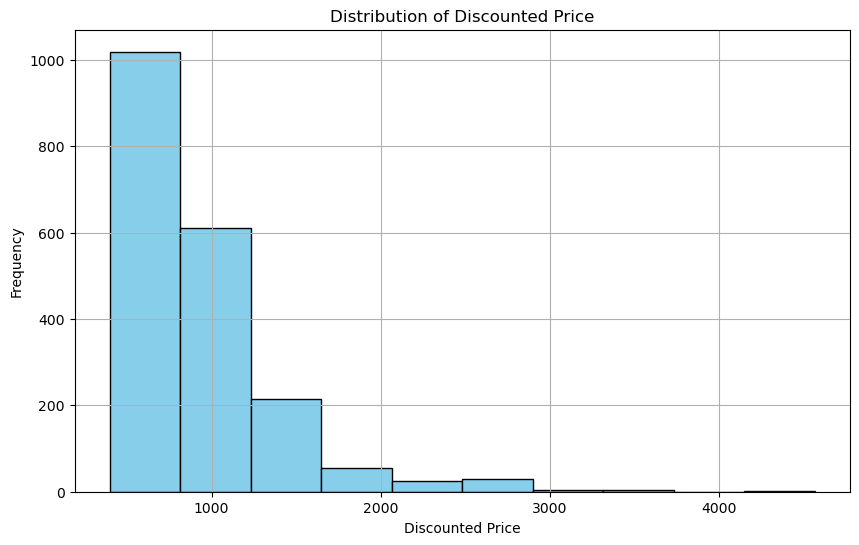

In [53]:
# Distribution of Original Price
plt.figure(figsize=(10, 6))
plt.hist(df['Discounted Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [54]:
# Replace "NEW" with 0 in "User Rating" column
df["User Rating"] = df["User Rating"].replace("NEW", 0)

In [55]:
# Drop non-numeric columns
numeric_df = df.drop(columns=["Hotel Name", "Area", "Region", "Rating_Summary", "Hotel Category"])

### Correlation Matrix

In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
encoded_df = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over non-numerical columns and encode them
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object':
        encoded_df[col] = label_encoder.fit_transform(encoded_df[col].astype(str))

# Calculate correlation matrix
corr = encoded_df.corr()

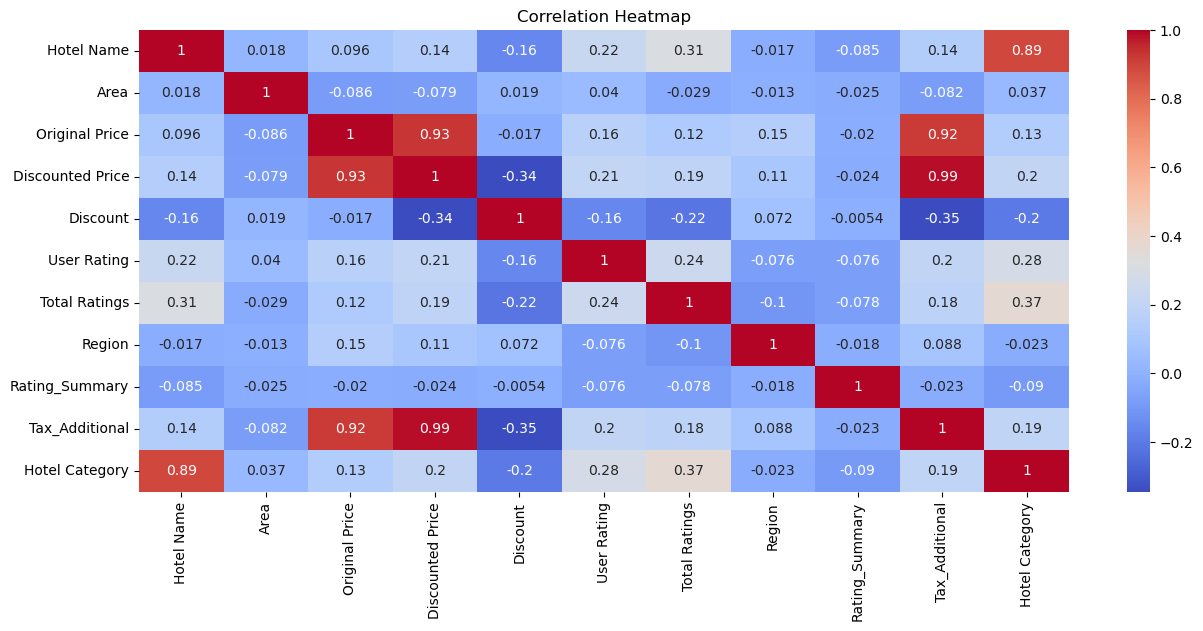

In [95]:
# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

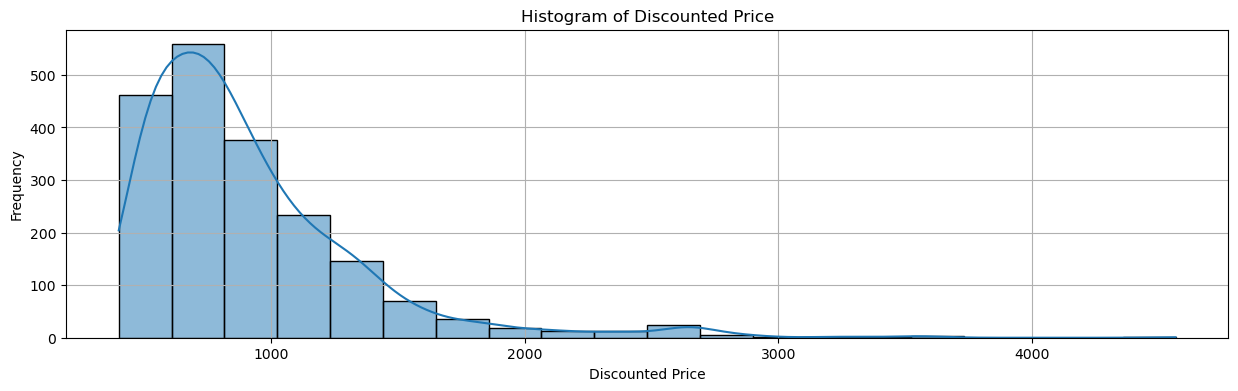

In [97]:
# Univariate Analysis
# Plotting the histogram
plt.figure(figsize=(15, 4))
sns.histplot(df['Discounted Price'], bins=20, kde=True)
plt.title('Histogram of Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

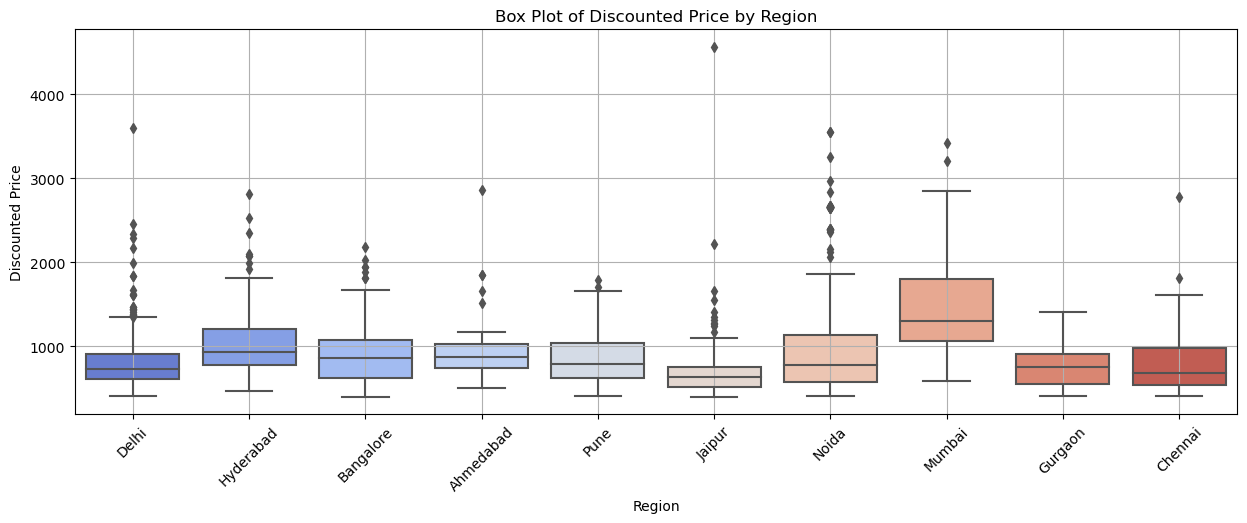

In [98]:
# Plotting the box plot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Region', y='Discounted Price', data=df, palette='coolwarm')
plt.title('Box Plot of Discounted Price by Region')
plt.xlabel('Region')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

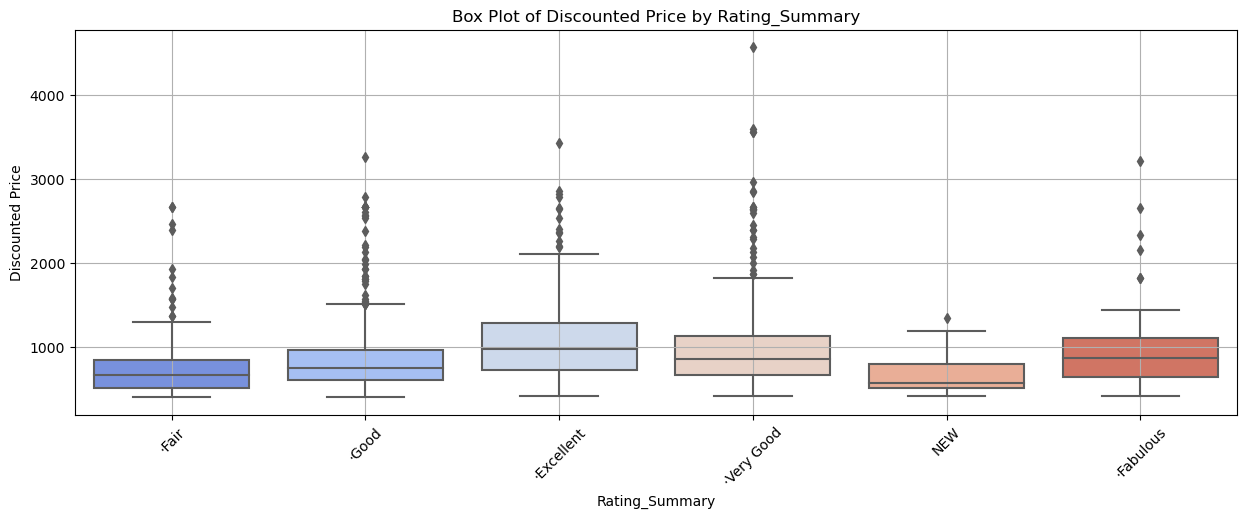

In [99]:
# Plotting the box plot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Rating_Summary', y='Discounted Price', data=df, palette='coolwarm')
plt.title('Box Plot of Discounted Price by Rating_Summary')
plt.xlabel('Rating_Summary')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

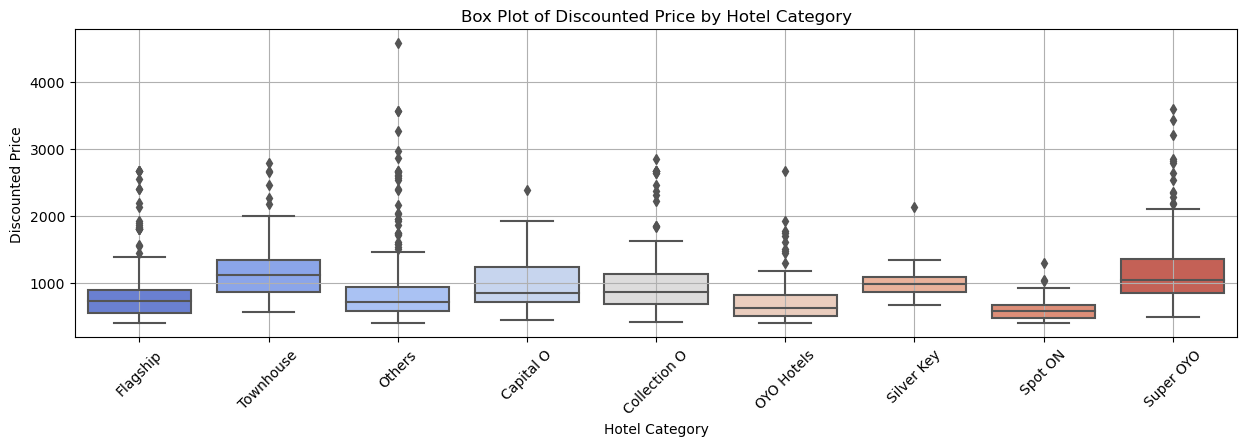

In [101]:
# Plotting the box plot
plt.figure(figsize=(15, 4))
sns.boxplot(x='Hotel Category', y='Discounted Price', data=df, palette='coolwarm')
plt.title('Box Plot of Discounted Price by Hotel Category')
plt.xlabel('Hotel Category')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# OUTLIERS 

## Identifying Outliers

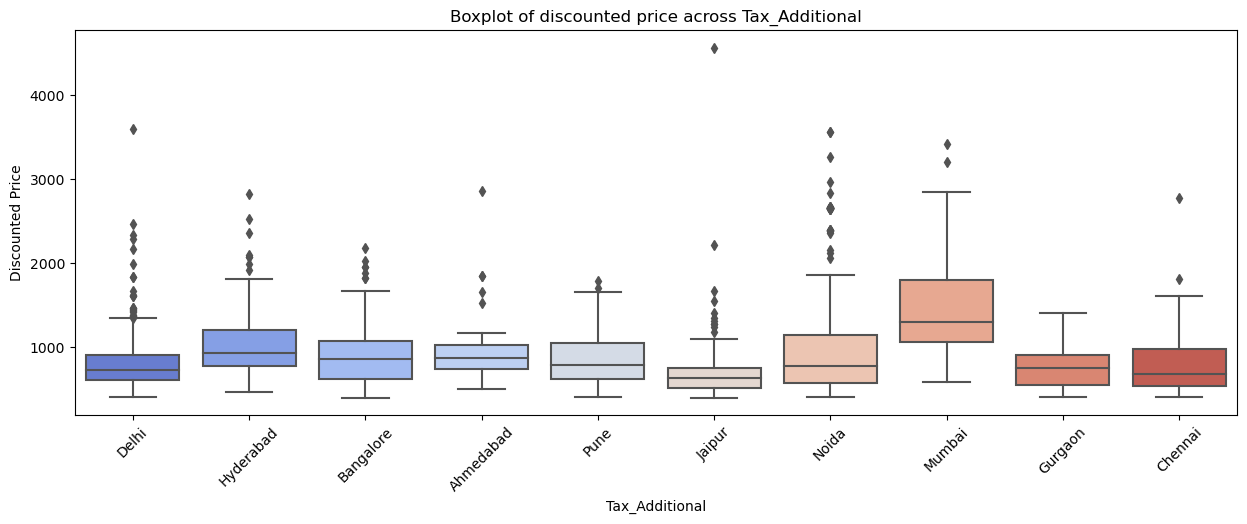

In [102]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x= 'Region', y='Discounted Price', palette='coolwarm')
plt.title(f'Boxplot of discounted price across {col}')
plt.xlabel(col)
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.show()

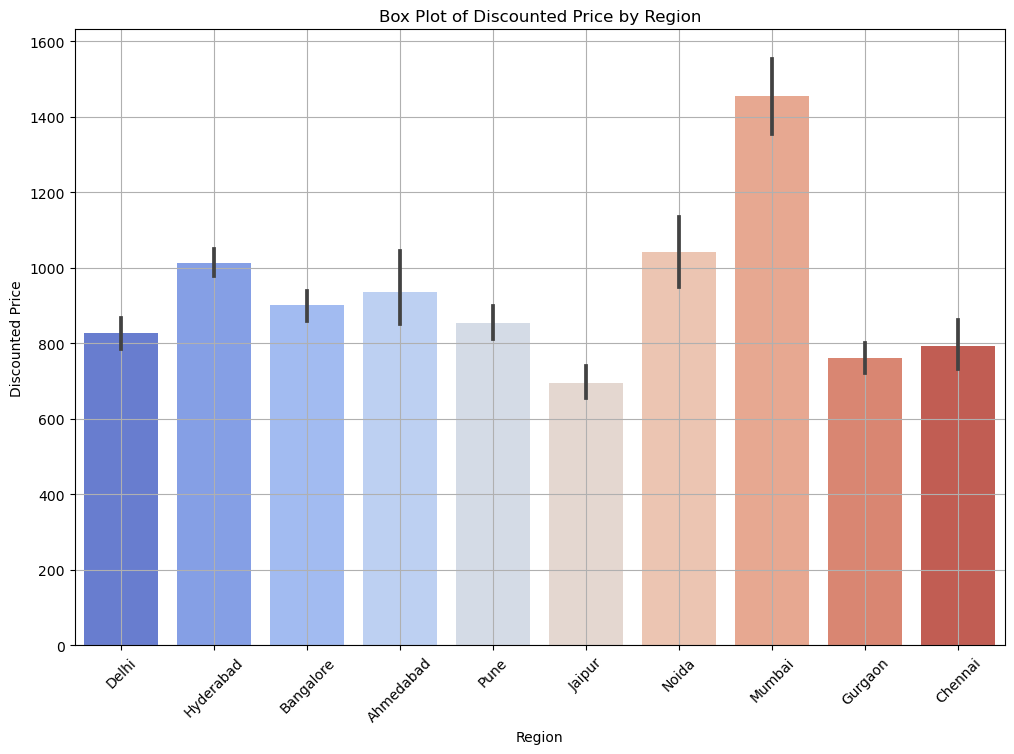

In [77]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Discounted Price', data=df, palette='coolwarm')
plt.title('Box Plot of Discounted Price by Region')
plt.xlabel('Region')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

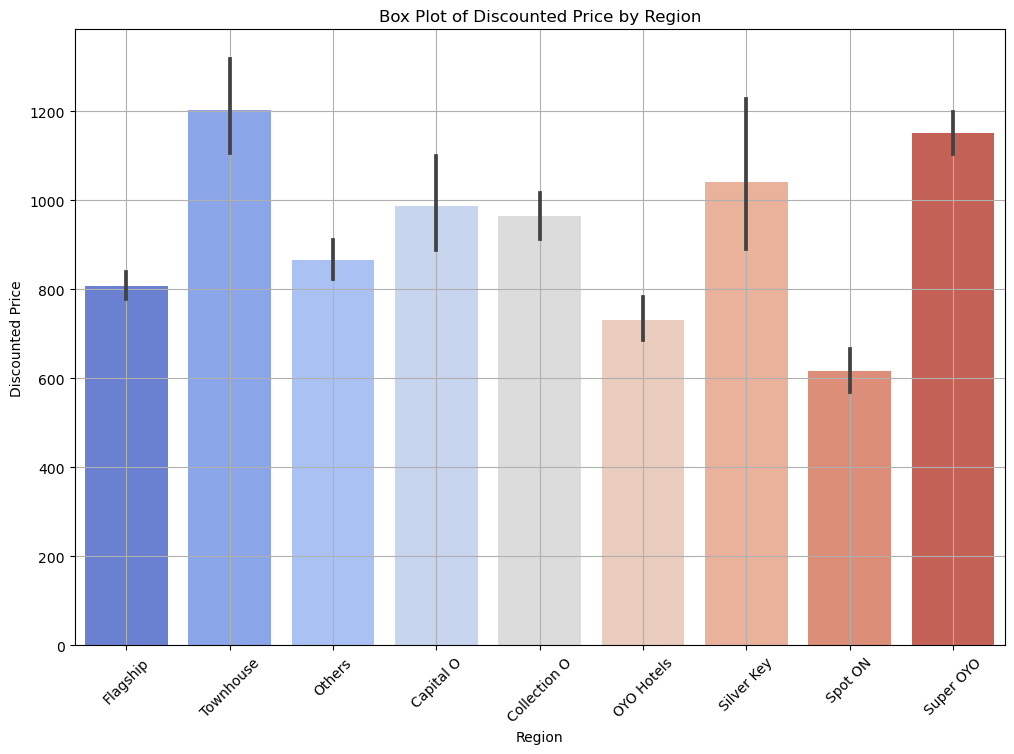

In [78]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Hotel Category', y='Discounted Price', data=df, palette='coolwarm')
plt.title('Box Plot of Discounted Price by Region')
plt.xlabel('Region')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

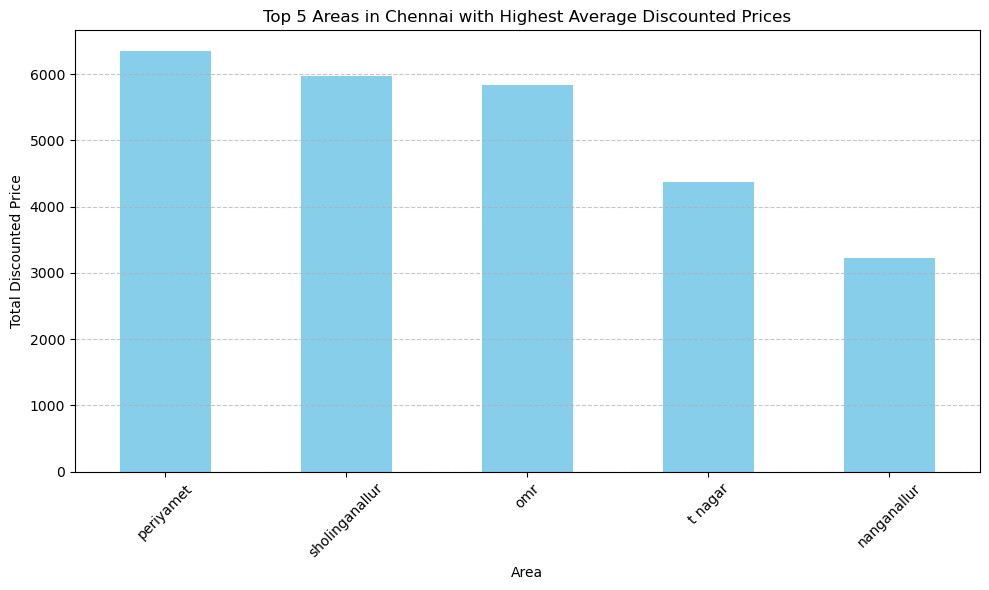

In [85]:
# Filter data for bookings in Chennai
chennai_bookings = df[df['Region'] == 'Chennai']

# Group by area and calculate the average discounted price
area_discounts = chennai_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Chennai with Highest Average Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

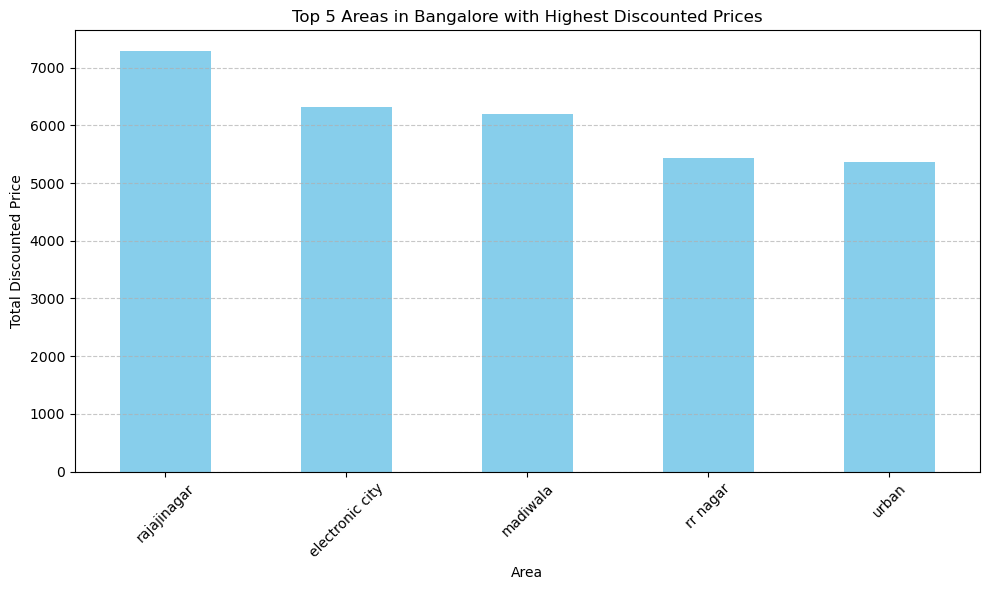

In [87]:
# Filter data for bookings in Chennai
Bangalore_bookings = df[df['Region'] == 'Bangalore']

# Group by area and calculate the average discounted price
area_discounts = Bangalore_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Bangalore with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

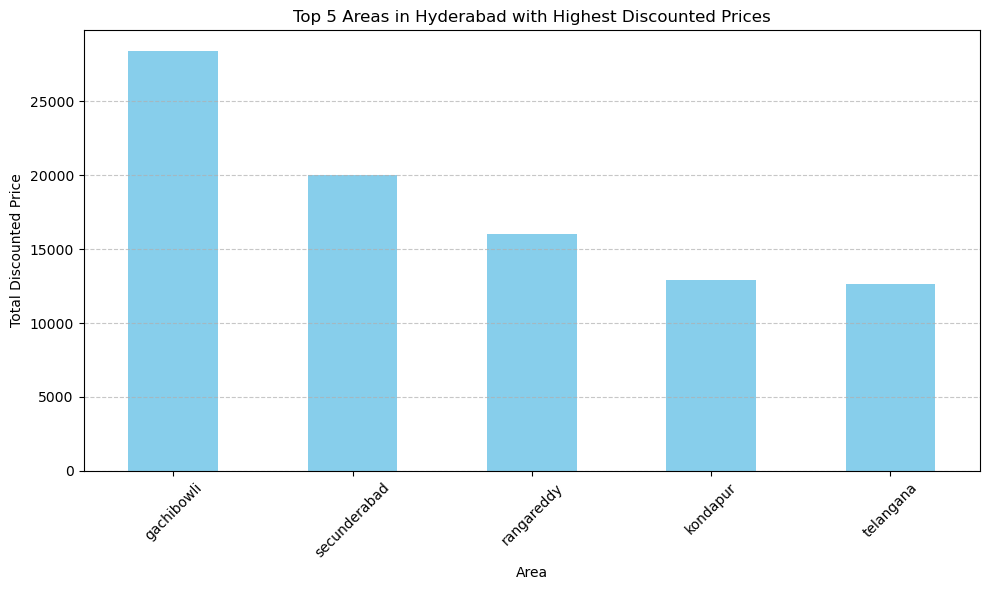

In [88]:
# Filter data for bookings in Hyderabad
Hyderabad_bookings = df[df['Region'] == 'Hyderabad']

# Group by area and calculate the average discounted price
area_discounts = Hyderabad_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Hyderabad with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

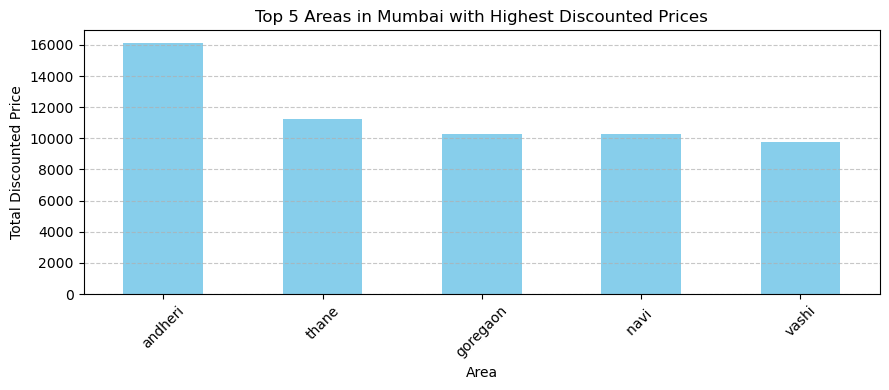

In [104]:
# Filter data for bookings in Mumbai
Mumbai_bookings = df[df['Region'] == 'Mumbai']

# Group by area and calculate the average discounted price
area_discounts = Mumbai_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(9, 4))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Mumbai with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

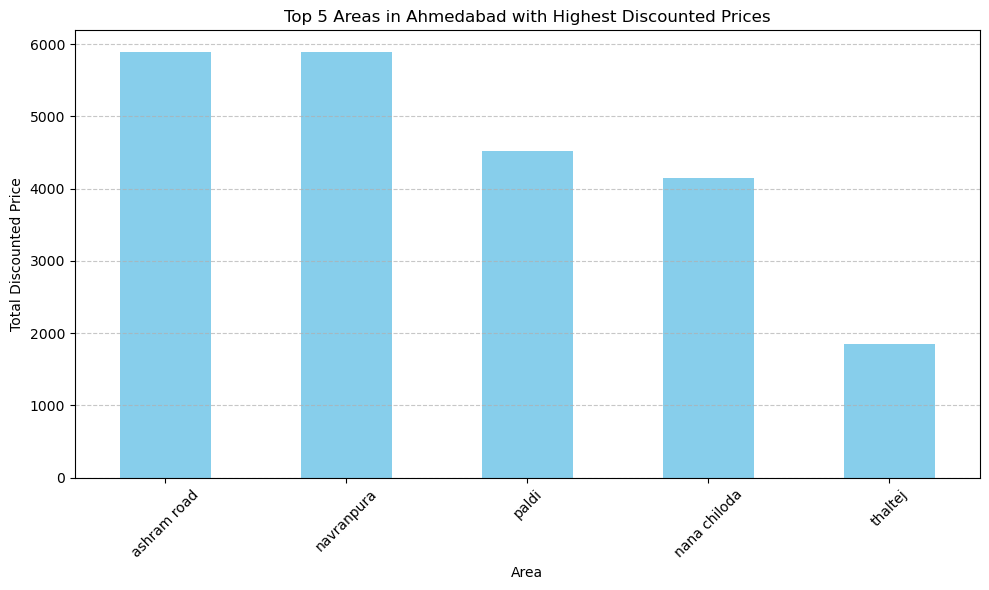

In [90]:
# Filter data for bookings in Ahmedabad
Ahmedabad_bookings = df[df['Region'] == 'Ahmedabad']

# Group by area and calculate the average discounted price
area_discounts = Ahmedabad_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Ahmedabad with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

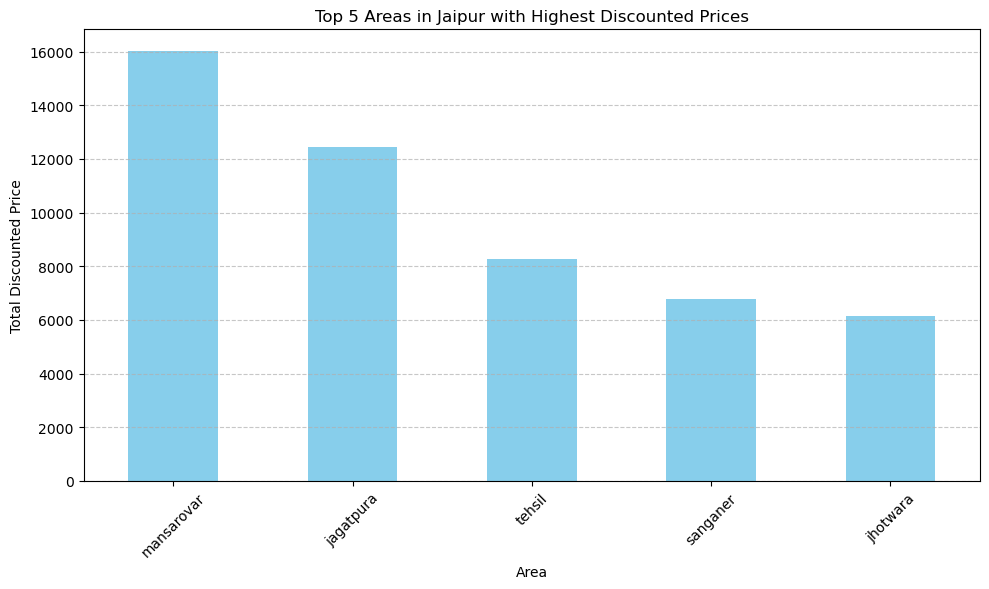

In [92]:
# Filter data for bookings in Jaipur
Jaipur_bookings = df[df['Region'] == 'Jaipur']

# Group by area and calculate the average discounted price
area_discounts = Jaipur_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Jaipur with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

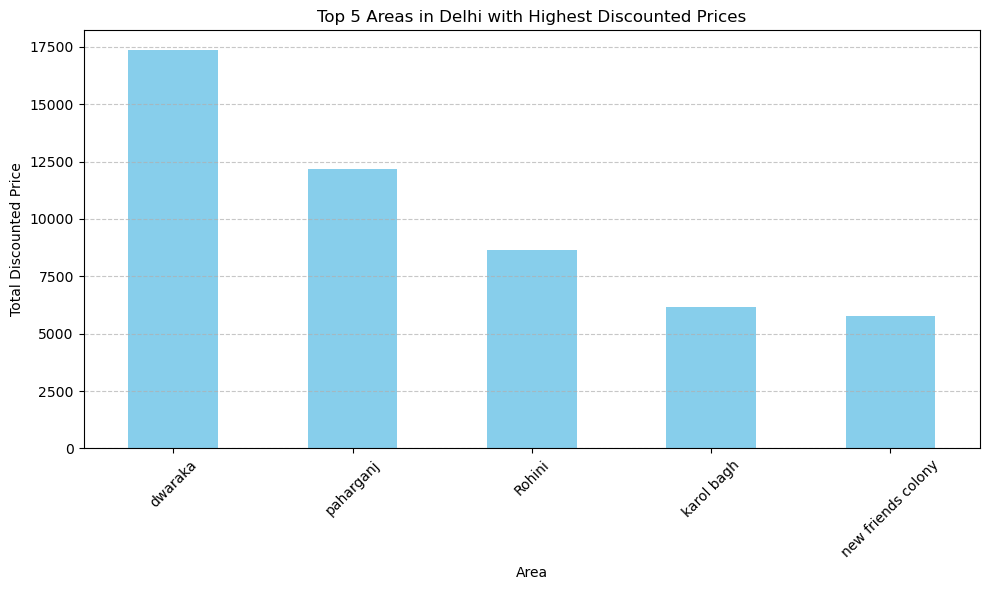

In [93]:
# Filter data for bookings in delhi
Delhi_bookings = df[df['Region'] == 'Delhi']

# Group by area and calculate the average discounted price
area_discounts = Delhi_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Delhi with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

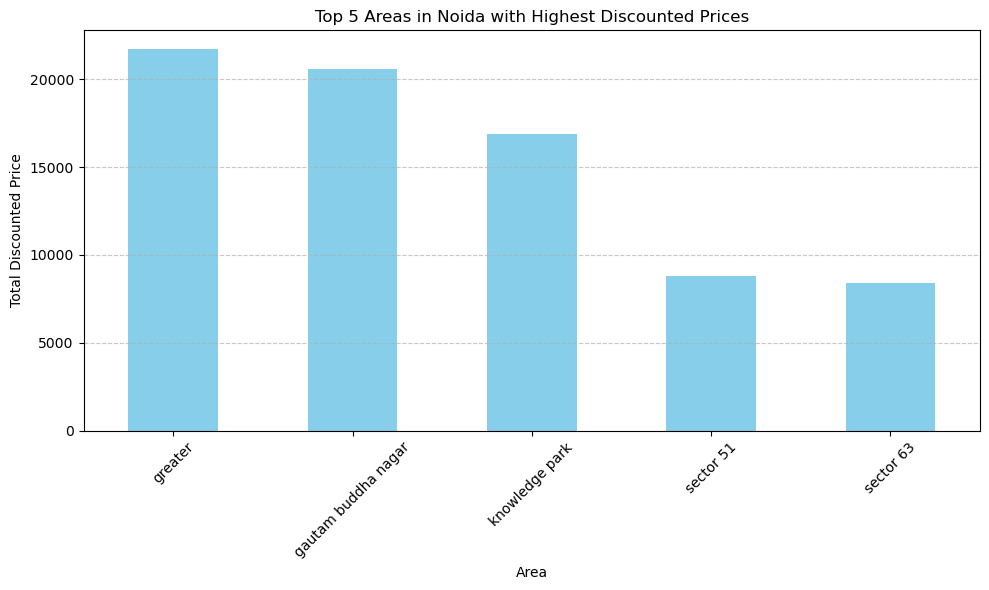

In [94]:
# Filter data for bookings in noida
Noida_bookings = df[df['Region'] == 'Noida']

# Group by area and calculate the average discounted price
area_discounts = Noida_bookings.groupby('Area')['Discounted Price'].sum()

# Sort the areas based on the average discounted price and get the top 5
top_areas = area_discounts.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 5 Areas in Noida with Highest Discounted Prices')
plt.xlabel('Area')
plt.ylabel('Total Discounted Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

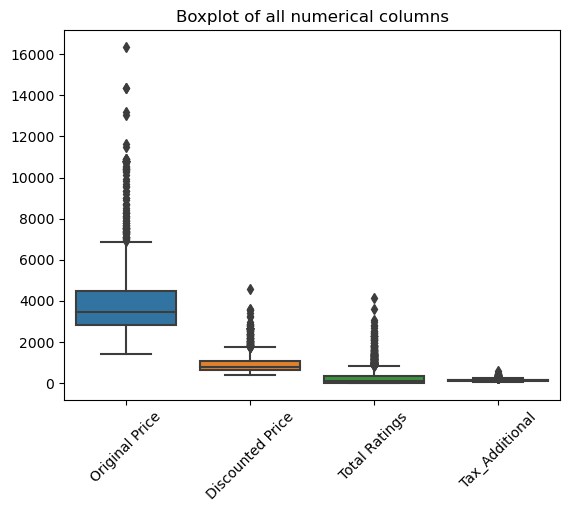

In [65]:
# Create a boxplot of the data with outliers shown
sns.boxplot(data=df)
plt.title('Boxplot of all numerical columns')
plt.xticks(rotation=45)
plt.show()

## Treating Outliers

### IQR Method and Z-Score Method

In [66]:
import numpy as np
import pandas as pd

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Calculate z-scores for numerical columns
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Define threshold for outliers (e.g., z-score > 3 or z-score < -3)
z_score_threshold = 3

# Identify outliers based on z-scores
outliers_z_score = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)

# Calculate quartiles for numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits for outliers detection using IQR method
upper_limit_iqr = Q3 + 1.5 * IQR
lower_limit_iqr = Q1 - 1.5 * IQR

# Identify outliers based on IQR method
outliers_iqr = (df[numerical_cols] < lower_limit_iqr) | (df[numerical_cols] > upper_limit_iqr)

# Cap outliers using both methods
capped_df_z_score = df.copy()  # Create copies to preserve the original DataFrame
capped_df_iqr = df.copy()

for col in numerical_cols:
    capped_df_z_score[col] = np.where(outliers_z_score[col], np.clip(df[col], df[col].quantile(0.25), df[col].quantile(0.75)), df[col])
    capped_df_iqr[col] = np.where(outliers_iqr[col], np.clip(df[col], lower_limit_iqr[col], upper_limit_iqr[col]), df[col])

# Calculate percentage of outliers detected by z-score method after capping
outlier_percentage_z_score_capped = ((capped_df_z_score != df).sum().sum() / (len(df) * len(numerical_cols))) * 100

# Calculate percentage of outliers detected by IQR method after capping
outlier_percentage_iqr_capped = ((capped_df_iqr != df).sum().sum() / (len(df) * len(numerical_cols))) * 100

# Print the results
print(f"Percentage of outliers detected by z-score method after capping: {outlier_percentage_z_score_capped}%")
print(f"Percentage of outliers detected by IQR method after capping: {outlier_percentage_iqr_capped}%")


Percentage of outliers detected by z-score method after capping: 2.512755102040816%
Percentage of outliers detected by IQR method after capping: 6.275510204081633%


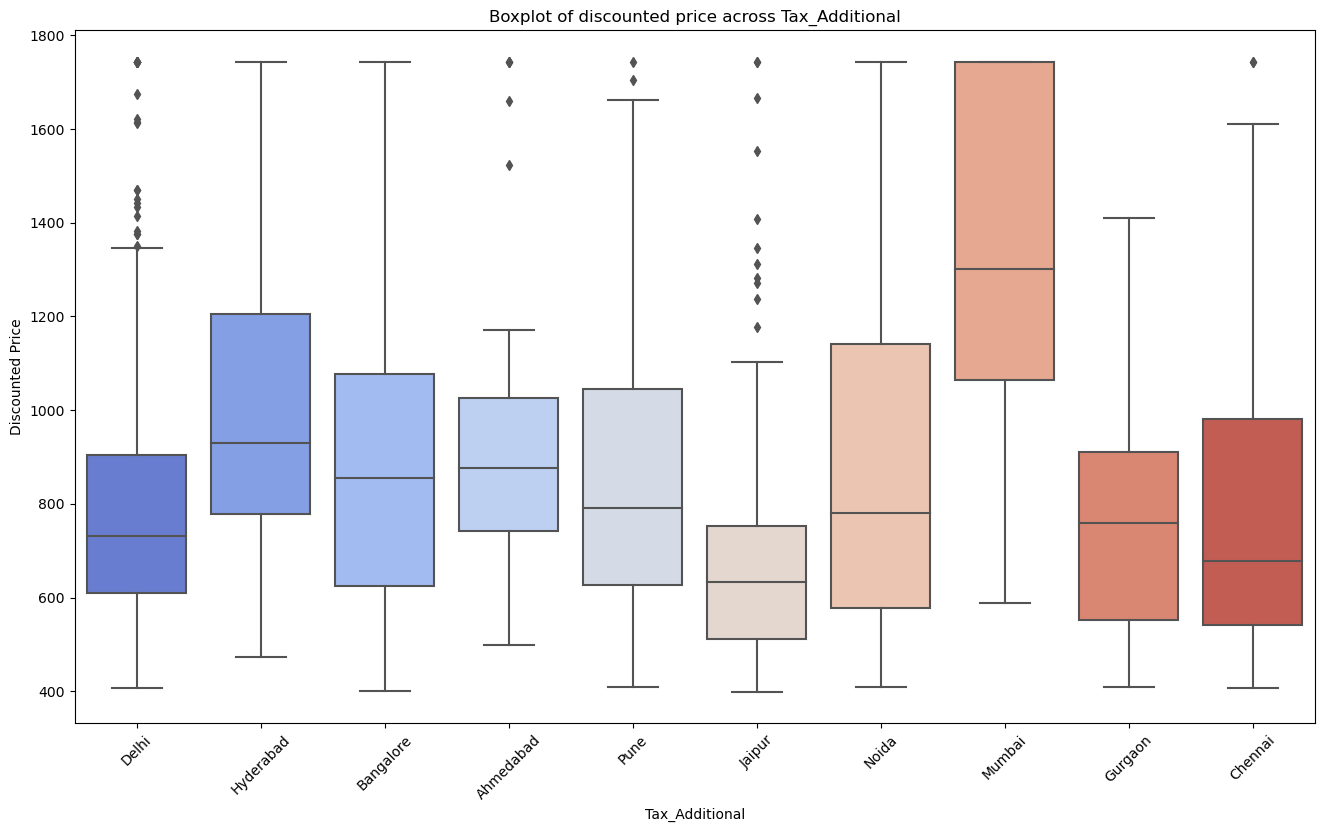

In [67]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=capped_df_iqr, x= 'Region', y='Discounted Price', palette='coolwarm')
plt.title(f'Boxplot of discounted price across {col}')
plt.xlabel(col)
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.show()

In [68]:
capped_df_iqr.describe().T

,count,mean,std,min,25%,50%,75%,max
Original Price,1960.0,3767.498724,1283.304943,1434.0,2822.0,3456.0,4461.0,6919.5
Discounted Price,1960.0,886.804337,348.371238,399.0,626.0,797.5,1073.0,1743.5
Total Ratings,1960.0,246.763191,280.862375,1.0,27.0,124.0,358.0,854.5
Tax_Additional,1960.0,146.585459,42.428205,78.0,114.0,136.0,169.0,251.5


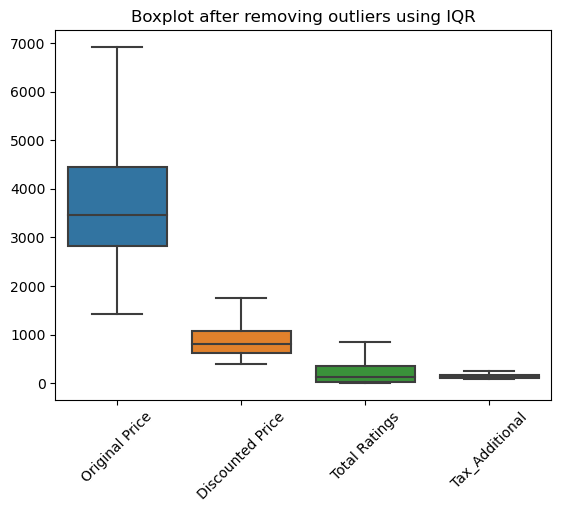

In [69]:
# Create boxplot after removing outliers using IQR method for numerical columns
sns.boxplot(data=capped_df_iqr)
plt.title('Boxplot after removing outliers using IQR')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

### Removing Highly Correlated variables

In [70]:
# Drop the specified columns ('Original Price', 'Tax_Additional' & 'Discount') which are highly correlated with our target variable 'Discounted Price'
capped_df_iqr.drop(['Original Price', 'Tax_Additional', 'Discount'], axis=1, inplace=True)

# Check the updated DataFrame
capped_df_iqr.head()


,Hotel Name,Area,Discounted Price,User Rating,Total Ratings,Region,Rating_Summary,Hotel Category
0,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,662.0,3.4,411.0,Delhi,·Fair,Flagship
1,Flagship Padam Residency Near Laxmi Nagar metro,shankarpur,662.0,3.4,411.0,Delhi,·Fair,Flagship
2,Townhouse 1190 The Grand Plaza,nampally,889.0,3.5,63.0,Hyderabad,·Good,Townhouse
3,28119 Omkar Global Inn,bgs hospital,490.0,3.4,90.0,Bangalore,·Fair,Others
4,3 BY OYO Nami Residency Ahmedabad,paldi,1743.5,4.6,517.0,Ahmedabad,·Excellent,Others


In [71]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Hotel Name', 'Area', 'Region', 'Rating_Summary', 'Hotel Category'])

# Display the encoded DataFrame
df_encoded.head()

,Original Price,Discounted Price,Discount,User Rating,Total Ratings,Tax_Additional,Hotel Name_ Flagship Padam Residency Near Laxmi Nagar metro,Hotel Name_ Townhouse 1190 The Grand Plaza,Hotel Name_28119 Omkar Global Inn,Hotel Name_3 BY OYO Nami Residency Ahmedabad,...,Rating_Summary_·Very Good,Hotel Category_Capital O,Hotel Category_Collection O,Hotel Category_Flagship,Hotel Category_OYO Hotels,Hotel Category_Others,Hotel Category_Silver Key,Hotel Category_Spot ON,Hotel Category_Super OYO,Hotel Category_Townhouse
0,2794,662,72,3.4,411.0,120.0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2794,662,72,3.4,411.0,120.0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,4125,889,74,3.5,63.0,147.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2638,490,77,3.4,90.0,109.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,6000,2857,45,4.6,517.0,443.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


# Data Spliting

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Separate the predictor and target Variable
X = df_encoded.drop('Discounted Price', axis=1)
y = df_encoded['Discounted Price']
# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# Model Building

## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_std, y_train)

# Predict on the test set
y_pred = model.predict(X_test_std)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r_squared)




RMSE: 157.64172038946384
R-squared: 0.8614735814073674


# Decision Tree Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
model_desc = DecisionTreeRegressor(random_state=0)

# Train the model on the training data
model_desc.fit(X_train_std, y_train)

# Predict on the test set
y_pred = model_desc.predict(X_test_std)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("RMSE:", rmse)
print("R-squared:", r_squared)


RMSE: 84.28432202239934
R-squared: 0.9604010317863683


# Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(random_state=0)

# Train the model on the training data
model.fit(X_train_std, y_train)

# Predict on the test set
y_pred = model.predict(X_test_std)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r_squared)


RMSE: 42.47032409007878
R-squared: 0.9899454780889136


# XGBoost Regression

In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = XGBRegressor(random_state=0)

# Train the model on the training data
model.fit(X_train_std, y_train)

# Predict on the test set
y_pred = model.predict(X_test_std)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r_squared)


RMSE: 36.09271263592218
R-squared: 0.9927384501654256


In [ ]:
df.info